In [11]:
import pandas as pd
import plotly.express as px
from country_converter import CountryConverter
from pprint import PrettyPrinter
from pymongo import MongoClient

In [10]:
#pp is the object, PrettyPrinter() is the class which we follow its ibstructions (blueprint) 
## so here yopu go from class to object which is pp, (indent=2) is the argument
pp = PrettyPrinter(indent=2)
print("pp type:", type(pp))

pp type: <class 'pprint.PrettyPrinter'>


# Connnect to MongoDB DataBase

In [12]:
client = MongoClient(host="loalhost", port=27017)
print("clien type:", type(client))

clien type: <class 'pymongo.synchronous.mongo_client.MongoClient'>


## Print a list of the databases available on client.

In [15]:
# pp.pprint(list(client.list_databases()))

## We're interested in the "wqu-abtest" database, so let's assign a variable and get moving.

### By the way, did you notice our old friend the air quality data? Isn't it nice to know that if you ever wanted to go back and do those projects again, the data will be there waiting for you?

### Assign the "ds-applicants" collection in the "wqu-abtest" database to the variable name ds_app.

In [16]:
# db = client["wqu-abtest"]
# ds_app = db["ds-applicants"]
# print("ds_app type:", type(ds_app))

## Use the count_documents method to see how many documents are in the ds_app collection.

In [17]:
# n_documents = ds_app.count_documents({})
# print("Num. documents in 'ds-applicants':", n_documents)

## Use the find_one method to retrieve one document from the ds_app collection and assign it to the variable name result.

In [18]:
# result = ds_app.find_one({
# })
# print("result type:", type(result))
# pp.pprint(result)

# Open the Data from Excel

In [51]:
df = pd.read_excel(r"C:\Users\hp\WorldQuantum\7) A-B Testing\Wq-TestInfo-AB.xlsx")
df

,_id,firstName,lastName,email,birthday,gender,highestDegreeEarned,countryISO2,admissionsQuiz
0,6525d787953844722c8383f8,Terry,Hassler,terry.hassler28@yahow.com,1998-04-29,male,Bachelor's degree,GB,incomplete
1,6525d787953844722c8383f9,Alan,Noble,alan.noble91@hotmeal.com,1999-03-03,male,Bachelor's degree,NG,complete
2,6525d787953844722c8383fa,Ruth,Vedovelli,ruth.vedovelli46@microsift.com,1994-08-16,female,Master's degree,ZM,incomplete
3,6525d787953844722c8383fb,Jennifer,Mayer,jennifer.mayer25@gmall.com,1984-11-23,female,Bachelor's degree,NG,complete
4,6525d787953844722c8383fc,Ray,Hersey,ray.hersey99@hotmeal.com,1990-10-15,male,Master's degree,PK,complete
...,...,...,...,...,...,...,...,...,...
5020,6525d787953844722c839794,Victor,Collins,victor.collins67@microsift.com,1985-02-15,male,Bachelor's degree,UG,incomplete
5021,6525d787953844722c839795,Justin,Nelson,justin.nelson95@microsift.com,1992-08-30,male,High School or Baccalaureate,NG,complete
5022,6525d787953844722c839796,Rosemary,Marsha,rosemary.marsha44@gmall.com,1990-03-22,female,Bachelor's degree,SZ,complete
5023,6525d787953844722c839797,Florine,Thomas,florine.thomas60@hotmeal.com,1983-01-24,female,Master's degree,ZA,incomplete


# Nationality

#### Use the aggregate method to calculate how many applicants there are from each country.

In [52]:
df["countryISO2"].unique()

array(['GB', 'NG', 'ZM', 'PK', 'CM', 'VN', 'MN', 'HK', 'IN', 'GM', 'MW',
       'EG', 'ET', 'SG', 'CN', 'AI', 'AR', 'BD', 'TZ', 'US', 'RW', 'NP',
       'CD', 'SL', 'CY', 'ZA', 'FJ', 'GH', 'AO', 'KE', 'SO', 'IQ', 'ES',
       'SD', 'ID', 'MY', 'AL', nan, 'ZW', 'AF', 'PH', 'MU', 'CI', 'UG',
       'LK', 'MA', 'UA', 'DJ', 'MK', 'MZ', 'MX', 'PG', 'IT', 'BW', 'BT',
       'RU', 'TG', 'BJ', 'NE', 'FR', 'KG', 'TH', 'LB', 'TR', 'CA', 'BB',
       'TD', 'SS', 'AZ', 'LS', 'CR', 'BR', 'KR', 'LY', 'CO', 'PA', 'ML',
       'TJ', 'SZ', 'AD', 'TN', 'IL', 'GR', 'SN', 'BF', 'DE', 'KM', 'JO',
       'LR', 'MM', 'GW', 'AE', 'TW', 'PT', 'AU', 'UZ', 'DZ', 'CG', 'SK',
       'AG', 'NL', 'HT', 'GN', 'ER', 'PR', 'RS', 'AX', 'BG', 'TL', 'ST',
       'BY', 'DM', 'YE', 'TO', 'KZ', 'HU', 'VE', 'GY', 'CZ', 'PL', 'WS',
       'PE', 'VI', 'BI', 'RO', 'TM', 'KH', 'BE', 'GQ', 'MG', 'CL', 'CF',
       'MR', 'AM', 'BA', 'VU', 'MO', 'SE', 'GA'], dtype=object)

In [58]:
# Count applicants per country
country_counts = df['countryISO2'].value_counts()

# Convert to DataFrame and reset index to get a column with country codes
df_nationality = country_counts.reset_index()

# Rename columns
df_nationality.columns = ['country_iso2', 'count']

# Sort by 'count'
df_nationality = df_nationality.sort_values('count', ascending=True)

print("df_nationality type:", type(df_nationality))
print("df_nationality shape", df_nationality.shape)
# Display the top rows
df_nationality.tail()

df_nationality type: <class 'pandas.core.frame.DataFrame'>
df_nationality shape (138, 2)


,country_iso2,count
4,BD,254
3,KE,304
2,IN,511
1,PK,568
0,NG,1238


## Country Converter: Open Source Software

In [62]:
cc = CountryConverter()
df_nationality["country_name"] = cc.convert(
    df_nationality["country_iso2"], to="name_short"
)

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (138, 3)


,country_iso2,count,country_name
137,GA,1,Gabon
110,GQ,1,Equatorial Guinea
111,BE,1,Belgium
112,SE,1,Sweden
113,KH,1,Cambodia


## Create Some Visualizations 

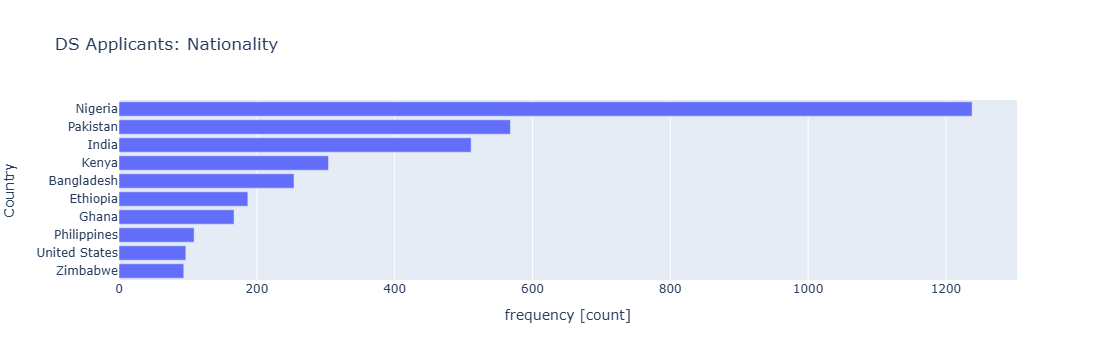

In [65]:
# Create horizontal bar chart
fig = px.bar(
    data_frame=df_nationality.tail(10),
    x="count",
    y="country_name",
    orientation="h",
    title="DS Applicants: Nationality"
)
# Set axis labels
fig.update_layout(xaxis_title="frequency [count]", yaxis_title="Country")
fig.show()

### Normaliza Nationality (What Percentage Does each Country Represent)

In [66]:
df_nationality["count_pct"] = (
    (df_nationality["count"] / df_nationality["count"].sum()) * 100
)
print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (138, 4)


,country_iso2,count,country_name,count_pct
137,GA,1,Gabon,0.019928
110,GQ,1,Equatorial Guinea,0.019928
111,BE,1,Belgium,0.019928
112,SE,1,Sweden,0.019928
113,KH,1,Cambodia,0.019928


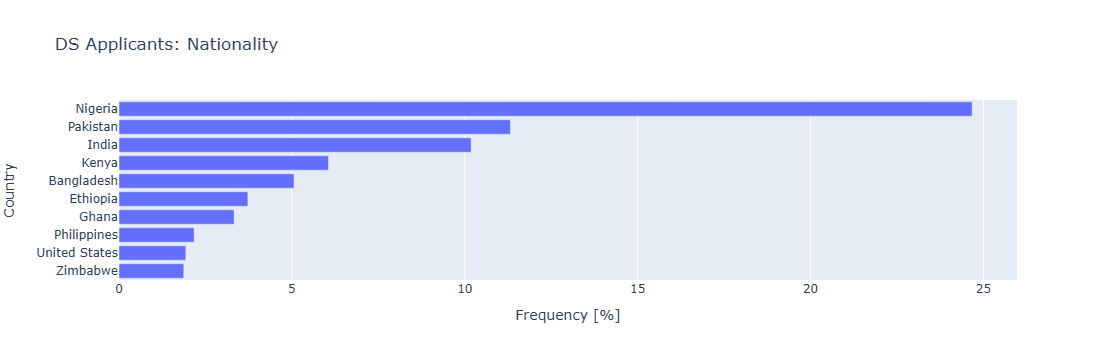

In [69]:
# Create horizontal bar chart
fig = px.bar(
    data_frame=df_nationality.tail(10),
    x="count_pct",
    y="country_name",
    orientation="h",
    title="DS Applicants: Nationality"
)
# Set axis labels
fig.update_layout(xaxis_title="Frequency [%]", yaxis_title="Country")
fig.show()

#### Bar charts are useful, but since we're talking about actual places here, let's see how this data looks when we put it on a world map. However, plotly express requires the ISO 3166-1 alpha-3 codes. This means that we'll need to add another column to our DataFrame before we can make our visualization.

## Add a column named "country_iso3" to df_nationality. It should contain the 3-letter ISO abbreviation for each country in "country_iso2".

In [70]:
df_nationality["country_iso3"] = cc.convert(df_nationality["country_iso2"], to="ISO3")

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (138, 5)


,country_iso2,count,country_name,count_pct,country_iso3
137,GA,1,Gabon,0.019928,GAB
110,GQ,1,Equatorial Guinea,0.019928,GNQ
111,BE,1,Belgium,0.019928,BEL
112,SE,1,Sweden,0.019928,SWE
113,KH,1,Cambodia,0.019928,KHM


## Choropleth Map

#### Create a function build_nat_choropleth that returns plotly choropleth map showing the "count" of DS applicants in each country in the globe. Be sure to set your projection to "natural earth", and color_continuous_scale to px.colors.sequential.Oranges.

nat_fig type: <class 'plotly.graph_objs._figure.Figure'>


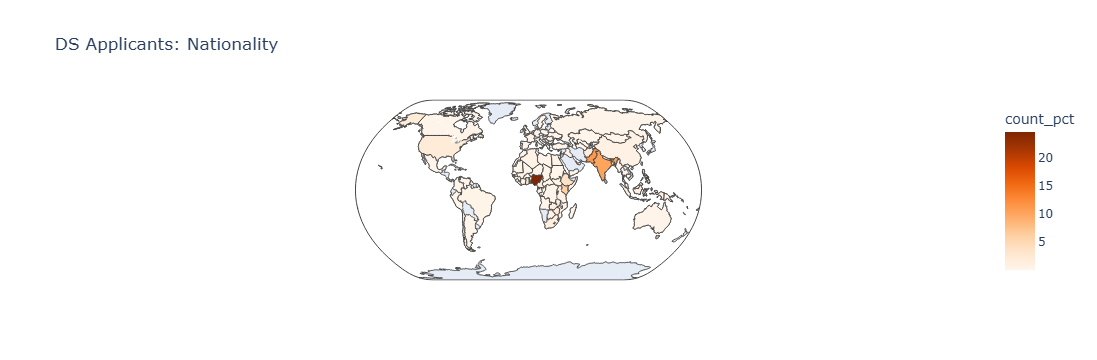

In [71]:
def build_nat_choropleth():
    fig = px.choropleth(
        data_frame=df_nationality,
        locations="country_iso3",
        color="count_pct",
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Oranges,
        title="DS Applicants: Nationality"
    )
    return fig


nat_fig = build_nat_choropleth()
print("nat_fig type:", type(nat_fig))
nat_fig.show()

# Age

### Use the aggregate method to calculate the age for each of the applicants in ds_app. Store the results in result.

In [73]:
from datetime import datetime

# Ensure 'birthday' column is in datetime format
df['birthday'] = pd.to_datetime(df['birthday'], errors='coerce')

# Get today's date
today = pd.to_datetime('today')

# Calculate age
df['age'] = (today - df['birthday']).astype('<m8[Y]')  # Difference in years

df

,_id,firstName,lastName,email,birthday,gender,highestDegreeEarned,countryISO2,admissionsQuiz,age
0,6525d787953844722c8383f8,Terry,Hassler,terry.hassler28@yahow.com,1998-04-29,male,Bachelor's degree,GB,incomplete,26.0
1,6525d787953844722c8383f9,Alan,Noble,alan.noble91@hotmeal.com,1999-03-03,male,Bachelor's degree,NG,complete,25.0
2,6525d787953844722c8383fa,Ruth,Vedovelli,ruth.vedovelli46@microsift.com,1994-08-16,female,Master's degree,ZM,incomplete,30.0
3,6525d787953844722c8383fb,Jennifer,Mayer,jennifer.mayer25@gmall.com,1984-11-23,female,Bachelor's degree,NG,complete,40.0
4,6525d787953844722c8383fc,Ray,Hersey,ray.hersey99@hotmeal.com,1990-10-15,male,Master's degree,PK,complete,34.0
...,...,...,...,...,...,...,...,...,...,...
5020,6525d787953844722c839794,Victor,Collins,victor.collins67@microsift.com,1985-02-15,male,Bachelor's degree,UG,incomplete,39.0
5021,6525d787953844722c839795,Justin,Nelson,justin.nelson95@microsift.com,1992-08-30,male,High School or Baccalaureate,NG,complete,32.0
5022,6525d787953844722c839796,Rosemary,Marsha,rosemary.marsha44@gmall.com,1990-03-22,female,Bachelor's degree,SZ,complete,34.0
5023,6525d787953844722c839797,Florine,Thomas,florine.thomas60@hotmeal.com,1983-01-24,female,Master's degree,ZA,incomplete,42.0


In [75]:
print("ages type:", type(df["age"]))
print("ages shape:", df["age"].shape)
df["age"].head()

ages type: <class 'pandas.core.series.Series'>
ages shape: (5025,)


0    26.0
1    25.0
2    30.0
3    40.0
4    34.0
Name: age, dtype: float64

age_fig type: <class 'plotly.graph_objs._figure.Figure'>


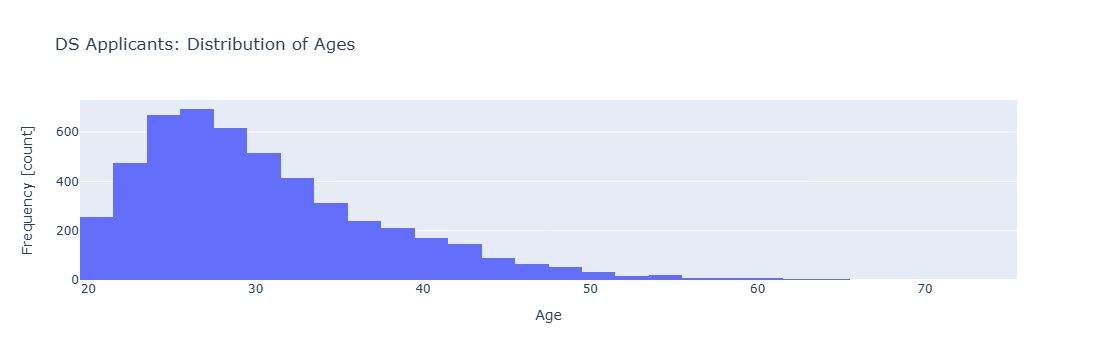

In [80]:
def build_age_hist():
    # Create histogram of `ages`
    fig = px.histogram(x=df["age"], nbins=50, title="DS Applicants: Distribution of Ages")
    # Set axis labels
    fig.update_layout(xaxis_title="Age", yaxis_title="Frequency [count]")
    return fig


age_fig = build_age_hist()
print("age_fig type:", type(age_fig))
age_fig.show()

# Education

In [81]:
# Value counts for 'highestDegreeEarned'
degree_counts = df['highestDegreeEarned'].value_counts()

# Convert to DataFrame
degree_counts_df = degree_counts.reset_index()

# Rename columns to match MongoDB aggregation style
degree_counts_df.columns = ['highestDegreeEarned', 'count']

# Display the DataFrame
print(degree_counts_df)

            highestDegreeEarned  count
0             Bachelor's degree   2643
1               Master's degree    862
2  High School or Baccalaureate    832
3      Some College (1-3 years)    612
4          Doctorate (e.g. PhD)     76


In [82]:
# Step 1: Count occurrences of each degree
degree_counts = df['highestDegreeEarned'].value_counts()

# Step 2: Convert to DataFrame and rename columns
education = (
    pd.DataFrame(degree_counts)
    .rename(columns={"highestDegreeEarned": "count"})  # Rename the count column
    .rename_axis("highest_degree_earned")              # Rename the index
)

# Step 3: Display the DataFrame
print("education type:", type(education))
print("education shape:", education.shape)
education.head()

education type: <class 'pandas.core.frame.DataFrame'>
education shape: (5, 1)


,count
highest_degree_earned,
Bachelor's degree,2643
Master's degree,862
High School or Baccalaureate,832
Some College (1-3 years),612
Doctorate (e.g. PhD),76


#### ... and... wait! We need to sort these categories more logically. Since we're talking about the highest level of education our applicants have, we need to sort the categories hierarchically rather than alphabetically or numerically. The order should be: "High School or Baccalaureate", "Some College (1-3 years)", "Bachelor's Degree", "Master's Degree", and "Doctorate (e.g. PhD)". Let's do that with a function.

In [83]:
# Step 4: Define custom sorting function
def ed_sort(counts):
    """Sort array `counts` from highest to lowest degree earned."""
    degrees = [
        "High School or Baccalaureate",
        "Some College (1-3 years)",
        "Bachelor's degree",
        "Master's degree",
        "Doctorate (e.g. PhD)",
    ]
    mapping = {k: v for v, k in enumerate(degrees)}
    sort_order = [mapping.get(c, len(degrees)) for c in counts]  # Handle missing degrees
    return sort_order

# Step 5: Apply the sorting function
education.sort_index(key=ed_sort, inplace=True)

# Step 6: Convert DataFrame to Series
education = education['count']

# Step 7: Display the Series
print("education_series type:", type(education))
print("education_series shape:", education.shape)
print(education)

education_series type: <class 'pandas.core.series.Series'>
education_series shape: (5,)
highest_degree_earned
High School or Baccalaureate     832
Some College (1-3 years)         612
Bachelor's degree               2643
Master's degree                  862
Doctorate (e.g. PhD)              76
Name: count, dtype: int64


ed_fig type: <class 'plotly.graph_objs._figure.Figure'>


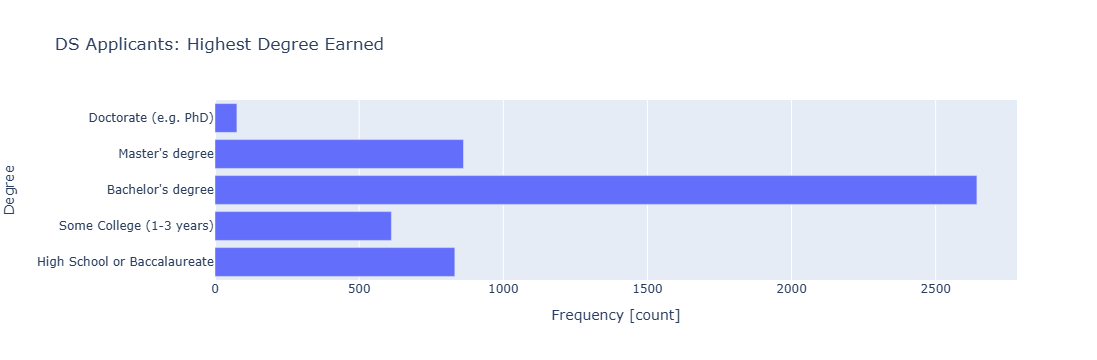

In [84]:
def build_ed_bar():
    # Create bar chart
    fig = px.bar(
        x=education,
        y=education.index,
        orientation="h",
        title="DS Applicants: Highest Degree Earned"
    )
    # Add axis labels
    fig.update_layout(xaxis_title="Frequency [count]", yaxis_title="Degree")
    return fig


ed_fig = build_ed_bar()
print("ed_fig type:", type(ed_fig))
ed_fig.show()